### Amruta Joshi_1001792172_DS_Assignment 2

##### 1. Install if required and import os, sys, string, nltk, en_core_web_sm, spacy,glob, pandas, numpy, TfidfVectorizer, cosine_similarity, corpus,               MDS, matplotlib, dendrogram, linkage, ward, plotly.figure_factory, sklearn.cluster, decomposition, CountVectorizer, LatentDirichletAllocation, TruncatedSVD, plotly
##### 2. Change directory to working directory
##### 3. Read excel file to dataframe
##### 4. Create cleaned corpus by normalizing text, removing digits and punctuations, removing stopwords, lammetizing the text
##### 5. Perform Multidimensional Scaling, Hierarchical Clustering, K-Means algorithm on data 
##### 6. Obtain 5 topics using three different algorithms, namely, NMF, LSA/LSI, and LDA

In [2]:
import os, sys, string, nltk, en_core_web_sm, spacy       # install and import required libraries 
import glob as glob
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk import corpus
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, ward
# from matplotlib import pyplot as plt
import plotly.figure_factory as ff
from sklearn.cluster import KMeans
from sklearn import decomposition 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD

!{sys.executable} -m pip install spacy
!{sys.executable} -m pip install plotly
os.chdir("/Users/amrut/Documents/UTA documents/Courses/Summer 2020/Data Science/HW/HW2/Patents_xls/Patents_xls")
files = glob.glob("*xlsx")                                               # fetch all xlsx files                                            

In [3]:
corpus_list=[]                                                         # create empty dictionary  
cleaned_corpus_list=[]
cleaned_corpus_list_new=[]
for i in range(13):
    df = pd.read_excel(files[i])                                       # read file into a dataframe
    titles = list(df['TI'])                                            # list contents of a column of df 
    abstracts = list(df['AB'])
    corpus_list.append(" ".join([str(a) + str(b) for a,b in zip(titles, abstracts)]))
    corpus_str=''.join([str(elem) for elem in corpus_list[i]])
#     corpus_str=corpus_str                                            # Normalize text
    exclude_list = string.digits + string.punctuation                  # Remove digits and punctuation
    table = str.maketrans(exclude_list, len(exclude_list) * " ")       
    corpus_str=corpus_str.translate(table)
    corpus_str=corpus_str.split()
    stopwords = nltk.corpus.stopwords.words("english")                 # Remove stopwords 
    corpus_str = [w for w in corpus_str if w not in stopwords]
    nlp = en_core_web_sm.load()                                        # Load NLP
    nlp.max_length = 94098311                                          # define maximum length of nlp
    corpus_str=' '.join([str(elem) for elem in corpus_str])            # convert list to string  
    doc_spacy = nlp(corpus_str)
    vectorizer = TfidfVectorizer()                                     # define tfidf vectorizer
    cleaned_corpus_list.append([token.lemma_ for token in doc_spacy])  # Lemmetize the text
    corpus_str=' '.join([str(elem) for elem in cleaned_corpus_list[i]])
    cleaned_corpus_list_new.append(corpus_str)                         # create list of lammentized text from all 13 files    
    

C:\Users\amrut\Anaconda3\lib\site-packages\spacy\util.py:271: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.0). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


##### Below all unsupervised learning algorithms yeild similar results

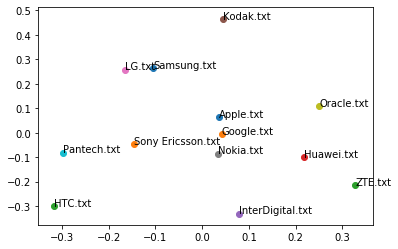

In [6]:
# perform multidimentional scaling on data
vectorizer = TfidfVectorizer()                                   # initialize a vectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 2) # define tfidf vectorizer
dtm = vectorizer.fit_transform(cleaned_corpus_list_new)          # create dtm
similarity = cosine_similarity(dtm)                              # cosine similarity
cos_distance = 1 - similarity                                    # convert to distance  
vectorizer = CountVectorizer()                                   # initialize vectorizer 
matrix = vectorizer.fit_transform(cleaned_corpus_list_new)          
feature_names= vectorizer.get_feature_names()                    # get feature names       
filename=[]               
for i in range(13):
    filename.append(files[i].split(".")[0] + ".txt")             # get filenames
mds = MDS(n_components = 2, dissimilarity='precomputed', random_state=1) # perform multidimentional scaling on data
pos = mds.fit_transform(cos_distance)
xs, ys = pos[:,0], pos[:,1]
for x, y, name in zip(xs, ys, filename):
    plt.scatter(x, y)                                                    # create scatter plot
    plt.text(x, y, name)                                                 # create text with names
plt.show()                                                               # show plot

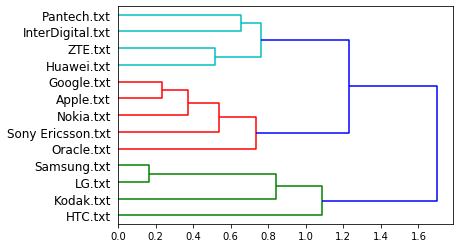

In [7]:
linkage_matrix = ward(cos_distance)                             # perform hierarchical clustering on data
dendrogram(linkage_matrix, orientation='right', labels=filename)
plt.show()                                                      # show dendrogram

In [10]:
vectorizer = TfidfVectorizer()                                  # perform K means algorithm on data
dtm = vectorizer.fit_transform(cleaned_corpus_list_new)         # create dtm
km = KMeans(n_clusters=5, random_state=999)                     
cluster_solution = km.fit(dtm)                                  # fit dtm
cluster_membership = km.predict(dtm)                            # predict dtm
doc_distance_to_center = km.transform(dtm)                      # transform dtm
labels = [name[:name.index(".")] for name in files]             # create labels     
clusters = zip(cluster_membership, labels)                      # create clusters
for a, b in clusters:
    print(a,":", b)                                             # print clusters and labels
top_docs = {'company': labels, 'cluster#': cluster_membership,\
            'firm_cluster_0':doc_distance_to_center[0:,0],\
            'firm_cluster_1':doc_distance_to_center[0:,1],\
            'firm_cluster_2':doc_distance_to_center[0:,2],\
            'firm_cluster_3':doc_distance_to_center[0:,3],\
            'firm_cluster_4':doc_distance_to_center[0:,4],
            }
df = pd.DataFrame(top_docs)                                     # create dataframe
df.to_excel("clusters.xlsx", "Sheet1")
df

0 : Apple
0 : Google
0 : HTC
2 : Huawei
3 : InterDigital
1 : Kodak
1 : LG
0 : Nokia
0 : Oracle
4 : Pantech
1 : Samsung
0 : Sony Ericsson
2 : ZTE


,company,cluster#,firm_cluster_0,firm_cluster_1,firm_cluster_2,firm_cluster_3,firm_cluster_4
0,Apple,0,0.328717,0.701133,0.791002,8.658834e-01,9.516855e-01
1,Google,0,0.312171,0.743769,0.712125,8.075528e-01,8.695485e-01
2,HTC,0,0.643411,0.885755,1.035707,1.057396e+00,1.061398e+00
3,Huawei,2,0.685163,0.903613,0.364227,9.177853e-01,9.261085e-01
4,InterDigital,3,0.778790,0.972624,0.857714,3.799066e-08,9.571331e-01
5,Kodak,1,0.836750,0.520999,1.071526,1.144346e+00,1.145769e+00
6,LG,1,0.750189,0.360392,0.933770,1.022002e+00,9.802198e-01
7,Nokia,0,0.368133,0.763937,0.616483,7.740132e-01,7.971667e-01
8,Oracle,0,0.516460,0.871609,0.818626,9.327395e-01,1.048177e+00
9,Pantech,4,0.802483,0.965288,0.862971,9.571331e-01,2.356080e-08


##### Topics diplayed by NMF are more similar

In [11]:
names = [fn[:-5] for fn in files]                                      # perform NMF algorithm on data
# print(names)
num_topics = 5                                                         # number of topics is 5
num_top_words = 20                                                     # number of words of every topic is 20
clf = decomposition.NMF(n_components = num_topics, random_state=1)
doctopic = clf.fit_transform(dtm)                                      # perform fit transform on dtm
topic_words = []
vocab=[]
for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]                # sort the indices of topic, revrse it and display number of top words
    topic_words.append([feature_names[i] for i in word_idx])           # append an empty list with feature names
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:20])))     # display 20 topic words


Topic 0: system the method datum one device first include may user provide network use second information base object application determine receive
Topic 1: first image electrode layer include method second the device form display light substrate datum one liquid pixel gate provide organic
Topic 2: method signal terminal communication service network control mobile system invention packet present message datum device call information gateway channel station
Topic 3: first device the communication second mobile unit electronic terminal include portable remote antenna one connect display use circuit body information
Topic 4: wtru signal the receive channel datum communication wireless method transmit code system use base power transmission apparatus one unit antenna


##### Topics diplayed by LDA are more similar

In [12]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=10000, stop_words='english') # perform LDA algorithm on data
num_topics = 5                                                                                # number of topics is 5
dtm = vectorizer.fit_transform(cleaned_corpus_list_new)                                       # perform fit transform on corpus
lda = LatentDirichletAllocation(n_components=num_topics, learning_method="batch",  max_iter=2000, random_state=0)
document_topics = lda.fit_transform(dtm)                                                      # perform lda fit transform on dtm
feature_names = vectorizer.get_feature_names()                                                # get feature names
def display_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))                                                            # display 5 topics
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words- 1:-1]]))     # display top words

display_topics(lda, feature_names, 20)                                                        # call function to diplay topics and top words

Topic 0:
layer electrode substrate display semiconductor light line image region gate pattern surface transistor pixel film source area drive organic panel
Topic 1:
message packet node code say element frame receiver subscriber location optical protocol content equipment rate symbol antenna application bit layer
Topic 2:
application object store database embodiment associate computer query client file node message storage instruction code cache web transaction packet event
Topic 3:
image display electronic element sensor portable audio camera document computer color housing content capture print light position store file associate
Topic 4:
display electrode layer substrate line liquid crystal pixel gate record light panel film region area drive surface image optical pattern


##### Topics diplayed by LSA are less similar

In [13]:
n=5                                                                                     # perform LSA algorithm on data
vectorizer = CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True)
data_vectorized = vectorizer.fit_transform(cleaned_corpus_list_new)                     # perform fit transform on corpus
def get_topics(model, vectorizer, model_name, df, top_n = 20):
        result = []
        for idx, topic in enumerate(model.components_):
            topic_label = model_name + "_topic_" + str(idx)                             # create topic label 
            score = "SCORE_" + str(idx)                                                 # create score
            aList = [(feature_names[i], topic[i])]                                      # define aList
            l1, l2 = zip(*aList)                                                        # get l1 and l2
            df[topic_label] = l1                                                        # assign topic label with l1
            df[score] = l2                                                              # assign score with l2
            return df
print("LSI being performed ...")
lsi_model = TruncatedSVD(n_components=n, n_iter = 5000)
lsi_Z = lsi_model.fit_transform(data_vectorized)
print("Generating LSI Model .....")
get_topics(lsi_model, vectorizer, "LSI", pd.DataFrame())                                # call a function to get topics
display_topics(lsi_model,feature_names,20)                                              # call a function to display topics and top words

LSI being performed ...
Generating LSI Model .....
Topic 0:
bus configuration dos circuitsa deep emboss channelsa equipmentdisclose broken confront baffle ecc darken electroluminescence bounce amine bytes cup amplitude arrangementthe
Topic 1:
confront baffle deep bus darken activate allot cup arrival externally decrypt body conditiona diffusion consist channelsa copolymerization bright channelsmethod broken
Topic 2:
credit channela arbitrarily devicedisclosed breakpoint bush capture compactly equalizing extremely contextually compressive entirety announcement exponent carrier earpiecea approximated cone ecc
Topic 3:
credit equalizing entirety bus carrier compactly engineer dos fail announcement circuitsa exponent approximated factor applicationssystem connectionless communicatively broken cameraportable distribute
Topic 4:
depress arrangementthe contemporaneous antioxidant breakpoint downa antenna deep communicationa configuration checking devicedisclosed depression degrade drawback co